In [78]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from funcs import view_nucl

/opt/miniconda3/envs/moldyn/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [17]:
#/home/_shared/_projects/gmx_template/GMX_system/sys_ref.pdb','/home/_shared/_projects/gmx_template/big_data/sys_md.xtc

mol=mda.Universe('/home/_shared/_projects/gmx_template/GMX_system/sys_ref.pdb')
view=view_nucl('/home/_shared/_projects/gmx_template/GMX_system/sys_ref.pdb')
#view.update_cartoon(sele='nucleic',opacity=0.5, component=0,subdiv=20)
#view.update_representation(opacity=0.5, repr_index=4,subdiv=20)
view.add_representation('hyperball', **{"sele": "(:A and ( 62 70 103 121 124 99)) or (:B and ( 26 34 58))","color": "yellow"})
view.add_representation('hyperball', **{"sele":" (:B and (29  49 50  57))","color": "red"})    
view.add_representation('contact', **{ "sele":" (:B and (29  49 50  57)) or (:A and ( 62 70 103 121 124 99)) or (:B and ( 26 34 58))", 
                                    "hydrophobic":"true","backboneHydrogenBond": "false","hydrogenBond": "false", "maxHydrophobicDist":4.5, "color": "yellow", "radius":0.2})  



view

NGLWidget()

![](../figs/Science_2017_fig1b2.png)

In [141]:
mol=mda.Universe('/home/_shared/_projects/gmx_template/GMX_system/sys_ref.pdb')
all_narlicar_sel={}
all_narlicar_sel_neighbours={}
reslist=[26,29,49,50,57,60,65,90,97]
R=0.3
name="dna_torsion_native"
with open('%s.plumed'%name,'w') as f:
    for resnum in reslist:
        all_narlicar_sel[resnum]=mol.select_atoms('not type H and segid B and resnum %d'%resnum)
        all_narlicar_sel_neighbours[resnum]=mol.select_atoms('around 5.0 (not type H and segid B and resnum %d)'%resnum)
        all_narlicar_sel_neighbours[resnum]=all_narlicar_sel_neighbours[resnum].residues.atoms.select_atoms('not type H')
        f.writelines('group%d: GROUP ATOMS='%resnum+",".join(all_narlicar_sel[resnum].indices.astype(str))+'\n')
        f.writelines('neigh%d: GROUP ATOMS='%resnum+",".join(all_narlicar_sel_neighbours[resnum].indices.astype(str))+'\n')
        f.writelines('crd%d: COORDINATION GROUPA=group%d GROUPB=neigh%d R_0=%.2f'%(resnum,resnum,resnum,R)+'\n')
    f.writelines('PRINT ARG=%s FILE=%s_out.dat'%(",".join(['crd%d'%d for d in reslist]),name))


In [71]:
!cat dna_torsion_native.plumed

group26: GROUP ATOMS=3505,3507,3509,3511,3515,3518,3522,3523
neigh26: GROUP ATOMS=2378,2380,2382,2385,2387,2391,2395,2396,3479,3481,3483,3486,3487,3488,3489,3490,3491,3493,3495,3498,3499,3500,3503,3504,3505,3507,3509,3511,3515,3518,3522,3523,3524,3526,3528,3531,3534,3535,3536,3539,3540,3541,3543,3546,3547,3548,3550,3552,3554,3558,3561,3565,3566,3987,3989,3991,3994,3997,4000,4002,4003,4006,4009,4010,4034,4036,4038,4041,4043,4047,4051,4052,4053,4055,4057,4060,4063,4066,4069,4073,4074
crd26: COORDINATION GROUPA=group26 GROUPB=neigh26 R_0=0.40
group29: GROUP ATOMS=3548,3550,3552,3554,3558,3561,3565,3566
neigh29: GROUP ATOMS=2219,2221,2223,2225,2229,2232,2236,2237,2317,2319,2321,2324,2325,2327,2329,2331,2333,2335,2336,2378,2380,2382,2385,2387,2391,2395,2396,3491,3493,3495,3498,3499,3500,3503,3504,3505,3507,3509,3511,3515,3518,3522,3523,3524,3526,3528,3531,3534,3535,3536,3539,3540,3541,3543,3546,3547,3548,3550,3552,3554,3558,3561,3565,3566,3567,3569,3571,3573,3577,3579,3580,3627,3629,3631,36

In [156]:
%%bash
plumed driver --plumed dna_torsion_native.plumed --mf_xtc /home/_shared/_projects/gmx_template/big_data/sys_md.xtc --mf_gro /home/_shared/_projects/gmx_template/GMX_system/sys_ref.pdb 


DRIVER: Found molfile format trajectory gro with name /home/_shared/_projects/gmx_template/GMX_system/sys_ref.pdb

DRIVER: Found molfile format trajectory xtc with name /home/_shared/_projects/gmx_template/big_data/sys_md.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.5.0 (git: Unknown) compiled on Jan 20 2019 at 00:17:34
PLUMED: Please cite this paper when using PLUMED [1]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/miniconda3/envs/moldyn/lib/plumed
PLUMED: For installed feature, see /opt/miniconda3/envs/moldyn/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 4770
PLUMED: File suffix: 
PLUMED: FILE: dna_torsion_native.plumed
PLUMED: Action GROUP
PLUMED:   with label group26
PLUMED:   list of atoms:
PLUMED:  3505 3507 3509 3511 3515 3518 3522 3523
PLUMED: Action 

In [157]:
name='dna_torsion_native_out.dat'
with open(name) as f: header=f.readline()
df=pd.DataFrame(np.loadtxt(name),columns=header.split()[2:])
df=df.set_index('time')
native_mean=df.describe().loc['mean']
df.describe()

,crd26,crd29,crd49,crd50,crd57,crd60,crd65,crd90,crd97
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
mean,56.887425,58.395281,47.302150,67.375449,53.709184,50.523357,56.903613,64.633406,47.611872
std,2.676436,2.971035,2.128961,2.403035,2.359968,2.296541,2.486436,2.288801,2.509814
min,48.537771,49.110989,40.955993,59.386656,45.330117,44.246758,49.147120,56.002004,40.045672
25%,55.133931,56.462241,45.777714,65.732842,52.170800,48.924185,55.293150,63.180007,45.899661
50%,57.009129,58.348523,47.117225,67.381107,53.783886,50.443389,56.961305,64.589154,47.631326
75%,58.673606,60.508361,48.632698,68.997823,55.341577,52.073217,58.556667,66.072369,49.272760
max,64.005808,68.557688,54.378645,74.601317,62.843633,57.619945,64.103194,72.537007,55.974043


In [145]:
mol=mda.Universe('/home/_shared/_projects/2018_h3-h4_mut_dyn/h3-h4_tm_mut_30_DNA_MD/GMX_system/sys_ref_renamed.pdb')
all_narlicar_sel={}
all_narlicar_sel_neighbours={}
reslist=[26,29,49,50,57,60,65,90,97]
R=0.3
name="dna_torsion_mutated"
with open('%s.plumed'%name,'w') as f:
    for resnum in reslist:
        all_narlicar_sel[resnum]=mol.select_atoms('not type H and segid B and resnum %d'%resnum)
        all_narlicar_sel_neighbours[resnum]=mol.select_atoms('around 5.0 (not type H and segid B and resnum %d)'%resnum)
        all_narlicar_sel_neighbours[resnum]=all_narlicar_sel_neighbours[resnum].residues.atoms.select_atoms('not type H')
        f.writelines('group%d: GROUP ATOMS='%resnum+",".join(all_narlicar_sel[resnum].indices.astype(str))+'\n')
        f.writelines('neigh%d: GROUP ATOMS='%resnum+",".join(all_narlicar_sel_neighbours[resnum].indices.astype(str))+'\n')
        f.writelines('crd%d: COORDINATION GROUPA=group%d GROUPB=neigh%d R_0=%.2f'%(resnum,resnum,resnum,R)+'\n')
    f.writelines('PRINT ARG=%s FILE=%s_out.dat'%(",".join(['crd%d'%d for d in reslist]),name))


In [112]:
!cat dna_torsion_mutated.plumed

group26: GROUP ATOMS=3486,3488,3490,3492,3496,3499,3503,3504
neigh26: GROUP ATOMS=2378,2380,2382,2385,2387,2391,2395,2396,3460,3462,3464,3467,3468,3469,3470,3471,3472,3474,3476,3479,3480,3481,3484,3485,3486,3488,3490,3492,3496,3499,3503,3504,3505,3507,3509,3512,3515,3516,3517,3520,3521,3522,3524,3527,3528,3529,3531,3533,3535,3539,3542,3546,3547,3962,3964,3966,3969,3972,3975,3977,3978,3981,3984,3985,4009,4011,4013,4016,4018,4022,4026,4027,4028,4030,4032,4035,4038,4041,4044,4048,4049
crd26: COORDINATION GROUPA=group26 GROUPB=neigh26 R_0=0.40
group29: GROUP ATOMS=3529,3531,3533,3535,3539,3542,3546,3547
neigh29: GROUP ATOMS=2219,2221,2223,2225,2229,2232,2236,2237,2317,2319,2321,2324,2325,2327,2329,2331,2333,2335,2336,2378,2380,2382,2385,2387,2391,2395,2396,3472,3474,3476,3479,3480,3481,3484,3485,3486,3488,3490,3492,3496,3499,3503,3504,3505,3507,3509,3512,3515,3516,3517,3520,3521,3522,3524,3527,3528,3529,3531,3533,3535,3539,3542,3546,3547,3548,3550,3552,3554,3558,3560,3561,3608,3610,3612,36

In [158]:
%%bash
plumed driver --plumed dna_torsion_mutated.plumed --mf_xtc /home/_shared/_projects/2018_h3-h4_mut_dyn/h3-h4_tm_mut_30_DNA_MD/big_data/sys_md.xtc --mf_gro /home/_shared/_projects/2018_h3-h4_mut_dyn/h3-h4_tm_mut_30_DNA_MD/GMX_system/sys_ref.pdb


DRIVER: Found molfile format trajectory gro with name /home/_shared/_projects/2018_h3-h4_mut_dyn/h3-h4_tm_mut_30_DNA_MD/GMX_system/sys_ref.pdb

DRIVER: Found molfile format trajectory xtc with name /home/_shared/_projects/2018_h3-h4_mut_dyn/h3-h4_tm_mut_30_DNA_MD/big_data/sys_md.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.5.0 (git: Unknown) compiled on Jan 20 2019 at 00:17:34
PLUMED: Please cite this paper when using PLUMED [1]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/miniconda3/envs/moldyn/lib/plumed
PLUMED: For installed feature, see /opt/miniconda3/envs/moldyn/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 4739
PLUMED: File suffix: 
PLUMED: FILE: dna_torsion_mutated.plumed
PLUMED: Action GROUP
PLUMED:   with label group26
PLUMED:   list of atoms:
PLUME

In [159]:
name='dna_torsion_mutated_out.dat'
with open(name) as f: header=f.readline()
df=pd.DataFrame(np.loadtxt(name),columns=header.split()[2:])
df=df.set_index('time')
cross_mean=df.describe().loc['mean']
df.describe()

,crd26,crd29,crd49,crd50,crd57,crd60,crd65,crd90,crd97
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000
mean,55.716230,58.380189,46.859563,66.349564,54.191800,50.411872,57.688086,65.322755,47.890167
std,2.765453,2.909987,1.936002,2.442686,2.171563,2.454204,2.373902,2.269767,2.771424
min,46.715860,49.501375,40.811355,58.203254,46.290092,42.449468,50.275830,58.213476,39.928859
25%,53.733240,56.300013,45.545265,64.652384,52.754573,48.735142,56.087383,63.793639,46.027986
50%,55.660812,58.350957,46.754677,66.301572,54.222423,50.441462,57.603011,65.267209,47.746157
75%,57.530097,60.422594,48.071525,68.107668,55.651069,52.032823,59.235727,66.865879,49.649340
max,66.029097,68.192840,55.654313,73.935197,61.725867,58.544497,65.715593,73.186602,59.648156


In [149]:
mol=mda.Universe('/home/_shared/_projects/2018_h3-h4_dyn/h3-h4_2_tm_60DNA_MD/GMX_system/sys_ref.pdb')
all_narlicar_sel={}
all_narlicar_sel_neighbours={}
reslist=[26,29,49,50,57,60,65,90,97]
R=0.3
name="contacts_tetramer_native"
with open('%s.plumed'%name,'w') as f:
    for resnum in reslist:
        all_narlicar_sel[resnum]=mol.select_atoms('not type H and segid B and resnum %d'%resnum)
        all_narlicar_sel_neighbours[resnum]=mol.select_atoms('around 5.0 (not type H and segid B and resnum %d)'%resnum)
        all_narlicar_sel_neighbours[resnum]=all_narlicar_sel_neighbours[resnum].residues.atoms.select_atoms('not type H')
        f.writelines('group%d: GROUP ATOMS='%resnum+",".join(all_narlicar_sel[resnum].indices.astype(str))+'\n')
        f.writelines('neigh%d: GROUP ATOMS='%resnum+",".join(all_narlicar_sel_neighbours[resnum].indices.astype(str))+'\n')
        f.writelines('crd%d: COORDINATION GROUPA=group%d GROUPB=neigh%d R_0=%.2f'%(resnum,resnum,resnum,R)+'\n')
    f.writelines('PRINT ARG=%s FILE=%s_out.dat'%(",".join(['crd%d'%d for d in reslist]),name))

In [150]:
!cat contacts_tetramer_native.plumed

group26: GROUP ATOMS=5474,5476,5478,5480,5484,5487,5491,5492
neigh26: GROUP ATOMS=4347,4349,4351,4354,4356,4360,4364,4365,4406,4408,4410,4413,4416,4417,4418,4419,4420,5448,5450,5452,5455,5456,5457,5458,5459,5460,5462,5464,5467,5468,5469,5472,5473,5474,5476,5478,5480,5484,5487,5491,5492,5493,5495,5497,5500,5503,5504,5505,5508,5509,5510,5512,5515,5516,5517,5519,5521,5523,5527,5530,5534,5535,5956,5958,5960,5963,5966,5969,5971,5972,5975,5978,5979,6003,6005,6007,6010,6012,6016,6020,6021,6022,6024,6026,6029,6032,6035,6038,6042,6043
crd26: COORDINATION GROUPA=group26 GROUPB=neigh26 R_0=0.30
group29: GROUP ATOMS=5517,5519,5521,5523,5527,5530,5534,5535
neigh29: GROUP ATOMS=4188,4190,4192,4194,4198,4201,4205,4206,4207,4209,4211,4214,4217,4220,4222,4223,4226,4229,4230,4272,4273,4276,4279,4282,4284,4285,4286,4288,4290,4293,4294,4296,4298,4300,4302,4304,4305,4347,4349,4351,4354,4356,4360,4364,4365,5460,5462,5464,5467,5468,5469,5472,5473,5474,5476,5478,5480,5484,5487,5491,5492,5493,5495,5497,5500,55

In [153]:
%%bash
plumed driver --plumed contacts_tetramer_native.plumed --mf_xtc /home/_shared/_projects/2018_h3-h4_dyn/h3-h4_2_tm_60DNA_MD/big_data/sys_md.xtc --mf_gro /home/_shared/_projects/2018_h3-h4_dyn/h3-h4_2_tm_60DNA_MD/GMX_system/sys_ref.pdb


DRIVER: Found molfile format trajectory gro with name /home/_shared/_projects/2018_h3-h4_dyn/h3-h4_2_tm_60DNA_MD/GMX_system/sys_ref.pdb

DRIVER: Found molfile format trajectory xtc with name /home/_shared/_projects/2018_h3-h4_dyn/h3-h4_2_tm_60DNA_MD/big_data/sys_md.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.5.0 (git: Unknown) compiled on Jan 20 2019 at 00:17:34
PLUMED: Please cite this paper when using PLUMED [1]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/miniconda3/envs/moldyn/lib/plumed
PLUMED: For installed feature, see /opt/miniconda3/envs/moldyn/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 9606
PLUMED: File suffix: 
PLUMED: FILE: contacts_tetramer_native.plumed
PLUMED: Action GROUP
PLUMED:   with label group26
PLUMED:   list of atoms:
PLUMED:  5474 

In [155]:
name='contacts_tetramer_native_out.dat'
with open(name) as f: header=f.readline()
df=pd.DataFrame(np.loadtxt(name),columns=header.split()[2:])
df=df.set_index('time')
tetra_mean=df.describe().loc['mean']
df.describe()

,crd26,crd29,crd49,crd50,crd57,crd60,crd65,crd90,crd97
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,55.525535,58.762075,47.637328,67.439278,54.005236,50.487337,57.863297,65.092757,46.780829
std,2.591187,2.689235,1.918273,2.283812,2.228712,2.412794,2.309183,2.349480,3.571453
min,47.063066,48.913641,41.614098,59.257461,46.309889,42.910487,51.282187,56.147231,37.790974
25%,53.845312,57.045309,46.345020,65.809615,52.496384,48.817957,56.258775,63.582016,44.106371
50%,55.590304,58.760787,47.566807,67.467890,54.044877,50.415572,57.809857,65.056807,46.641858
75%,57.341794,60.584110,48.840551,68.918235,55.570394,52.111847,59.485739,66.658756,49.179476
max,63.892604,66.331956,54.314675,74.971501,60.453304,58.146958,64.665814,73.510455,57.632282


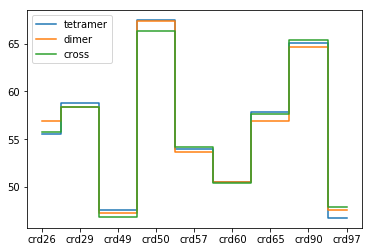

In [162]:
plt.step(list(native_mean.index), tetra_mean, where='mid', label='tetramer')
plt.step(list(native_mean.index),native_mean, where='mid', label=   'dimer')
plt.step(list(native_mean.index), cross_mean, where='mid', label=   'cross')
plt.legend()